# What Makes a Movie Succesful

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
wikidata_df = pd.read_json("./data/wikidata-movies.json.gz", lines=True)
genres_df = pd.read_json("./data/genres.json.gz", lines=True)
omdb_df = pd.read_json("./data/omdb-data.json.gz", lines=True)
rotten_df = pd.read_json("./data/rotten-tomatoes.json.gz", lines=True)

## Successful?
Do the various criteria for success (critic reviews, audience reviews, profit/loss) correlate with each other? Is there something you can say about better or worse kinds of “success”?

In [3]:
# Scalarize to percent
rotten_df = rotten_df.dropna() #!Is dropping na actually a good idea?
rotten_df['audience_average'] = rotten_df['audience_average']/5*100
rotten_df['critic_average'] = rotten_df['critic_average']/10*100

In [4]:
# Try to normalize
rotten_audAvg_Norm = np.square(rotten_df['audience_average'])
rotten_audPercent_Norm = np.square(rotten_df['audience_percent'])
rotten_critAvg_Norm = np.square(rotten_df['critic_average'])
rotten_critPercent_Norm = np.square(rotten_df['critic_percent'])

([array([2.000e+00, 3.000e+00, 4.900e+01, 1.740e+02, 2.360e+02, 1.124e+03,
         1.542e+03, 2.164e+03, 2.377e+03, 2.623e+03, 2.542e+03, 1.078e+03,
         1.620e+03, 5.470e+02, 5.250e+02, 7.300e+01, 4.100e+01, 6.000e+00,
         5.000e+00, 1.000e+00]),
  array([ 524., 1003., 1148., 1233., 1050., 1145., 1101.,  983., 1024.,
          826., 1213.,  955.,  944.,  904.,  898.,  802.,  578.,  261.,
          116.,   24.]),
  array([1.120e+02, 5.110e+02, 9.180e+02, 1.238e+03, 1.282e+03, 1.610e+03,
         1.834e+03, 1.615e+03, 1.629e+03, 1.427e+03, 1.563e+03, 9.730e+02,
         8.100e+02, 5.460e+02, 3.120e+02, 2.000e+02, 1.200e+02, 2.200e+01,
         9.000e+00, 1.000e+00]),
  array([2250.,  980.,  859.,  895.,  481.,  784.,  681.,  755.,  753.,
          428.,  785.,  571.,  844.,  823.,  720.,  831.,  823.,  516.,
          612., 1341.])],
 array([    0.,   500.,  1000.,  1500.,  2000.,  2500.,  3000.,  3500.,
         4000.,  4500.,  5000.,  5500.,  6000.,  6500.,  7000.,  7500.,
 

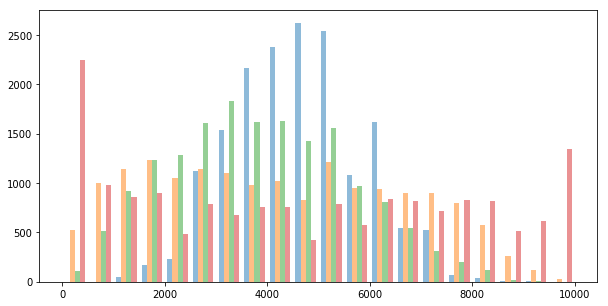

In [9]:
plt.figure(figsize=(10, 5))
plt.hist((rotten_audAvg_Norm, rotten_audPercent_Norm, rotten_critAvg_Norm, rotten_critPercent_Norm), alpha=0.5, bins=20)

In [8]:
anova = stats.f_oneway(rotten_df['audience_average'], rotten_df['audience_percent'], rotten_df['critic_average'], rotten_df['critic_percent'])
print(anova)

F_onewayResult(statistic=463.3124568813631, pvalue=5.492105415957375e-298)
